In [1]:
import matplotlib.pyplot as plt

In [2]:
# Size of the system calculation
n = 50
a = 1
c = 2/(np.sqrt(3)*a**2)
lx = n*a
level = (2*n**2)/(2*n-1)
ly = a*(level-1)*np.sqrt(3)/2
lx, ly

(50, 42.87263135300539)

# Analyzing potential functions

## Potential functions

In [3]:
def mie_potential(r,m,n,r_cut,sigma):
    
    eps = 1
    sigma = sigma # Defines when the repulsion should start
    rend = r_cut
    
    r_ = r 
    gamma_rep = m
    gamma_att = 0
    C = 4 #gamma_rep/(gamma_rep-gamma_att)*(gamma_rep/gamma_att)**(gamma_att/(gamma_rep-gamma_att))
    if(r<=rend):
        U = C*eps*((sigma/r_)**gamma_rep-(sigma/r_)**gamma_att)  - C*eps*((sigma/rend)**gamma_rep-(sigma/rend)**gamma_att) 
    else:
        U = 0
        
    return U

r = np.arange(.01,2,.001)
# M = [6,8,16,32,64,128]
# for m in M:
#     U1 = [mie_potential(x,1.2,1.05,m) for x in r]
#     plt.plot(r,U1, label=str(m))
    
# S = [.5,.85,.95,1,1.05,1.10,1.15,1.2]
# M = 12
# N = 6
# r_cut = 1
# for s in S:
#     U1 = np.array([mie_potential(x,M,N,r_cut,s) for x in r])
#     plt.plot(r,U1, label=str(s))
#     print(s,np.sum(U1[r > s]>0))
  
# plt.title("M="+str(M)+" N="+str(N)+" r_cut="+str(r_cut))
# plt.legend(title="sigma",loc='upper right')
    
# r_cut = [.5,.85,.95,1,1.05,1.10,1.15,1.2]
# M = 12
# N = 6
# sigma = 1
# for R in r_cut:
#     U1 = np.array([mie_potential(x,M,N,R,sigma) for x in r])
#     plt.plot(r,U1, label=str(R))
#     print(R,np.sum(U1[r > R]>0))
 
# plt.title("M="+str(M)+" N="+str(N)+" sigma="+str(sigma))
# plt.legend(title="r_cut",loc='upper right')


# r_cut = [.5,.85,.95,1,1.05,1.10,1.15,1.2]
# r_cut = [1,1.2]
# M = 128
# N = 0
# sigma = 1
# for R in r_cut:
#     U1 = np.array([mie_potential(x+R-1,M,N,R,R) for x in r])
#     plt.plot(r,U1, label=str(R))
#     print(R-1,R,np.sum(U1[r > R]>0))
 
# plt.title("M="+str(M)+" N="+str(N))
# plt.legend(title="r_cut/sigma",loc='upper right')

# U1 = np.array([mie_potential(x,12,6,1.2,1.2) for x in r])
# U2 = np.array([mie_potential(x,12,6,1,1) for x in r])
# plt.plot(r,U1-U2)
# plt.title("M="+str(M)+" N="+str(N)+"r_cut1=sigma1=1.2 and r_cut2=sigma2=1")

# plt.ylim(-4, 4)
# plt.xlim(.4,2)
# plt.xlabel("r, distance")
# plt.ylabel("Udiff, energy")
# plt.show()


In [4]:
def leonard_jones(r):
    eps = 1
    sigma = 1
    
    U = 4*eps*((sigma/r)**12-(sigma/r)**6)
    
    return U
    
def trunc_leonard_jones(r):
    
    eps = 1
    sigma = 1
    rend = 1.2
    
    if(r<=rend):
        U = 4*eps*((sigma/r)**12-(sigma/r)**6)
    else:
        U = 0
        
    return U

def trunc_leonard_jones2(r):
    
    eps = 1.0
    sigma = 1.0
    rend = 1
    
    r2inv  = (sigma/r)**2
    rinv6  = r2inv*r2inv*r2inv
    lj1 = 4*eps
    lj2 = 4*eps
    
    if(r<=rend):
        U = rinv6*(lj1*rinv6-lj2)
    else:
        U = 0
        
    return U
    
def trunc_shift_leonard_jones(r):
    eps = 1
    sigma = 1
    # 2.5*sigmtrumpa  for liquid #
    rend = 1.2
    
    if(r<=rend):
        U = 2*eps*((sigma/r)**12-(sigma/r)**6) - 2*eps*((sigma/rend)**12-(sigma/rend)**6) 
    else:
        U = 0
        
    return U
    
from itertools import repeat

def soft_sphere(r, n):
    eps = .0002
    sigma = 1
    
    if(r<=sigma):
        U = eps*(sigma/r)**n 
    else:
        U = 0
        
    return U

def lammps_soft(r, n=12):
    
    rend = 1
    A = 1
    if(r<=rend):
        U = A*((2+np.cos(np.pi*r/rend))**n-1)
#         U = A*((1+np.cos(np.pi*r/rend))**n)
    else:
        U = 0
        
    return U

def hooke(r):
    
    sigma = .5
    rend = 2*sigma
    K = 10000
    if(r<=rend):
        U = K*(rend-r)**2
    else:
        U = 0
        
    return U

def mie_potential(r,n, sigma):
    
    eps = 1
#     sigma = 1 # Defines when the repulsion should start
    rend = 1.2
    
    r_ = r 
    gamma_rep = 6
    gamma_att = 12
    C = 4 #gamma_rep/(gamma_rep-gamma_att)*(gamma_rep/gamma_att)**(gamma_att/(gamma_rep-gamma_att))
    if(r<=rend):
        U = C*eps*((sigma/r_)**gamma_rep-(sigma/r_)**gamma_att)  - C*eps*((sigma/rend)**gamma_rep-(sigma/rend)**gamma_att) 
    else:
        U = 0
        
    return U

# r = 2**(1/6)

# r = np.arange(.01,1.5,.001)
# #  [.75,.80,.85,.95,1,1.05,1.1,1.15,1.2]
# for sigma in [.995,1,1.005]:
#     U1 = [mie_potential(x,6,sigma) for x in r]
#     print(mie_potential(1,6,sigma))
#     plt.plot(r,U1, label=str(sigma))
    
# plt.ylim(-.5, 1)
# plt.xlim(.5, 1.25)
# plt.xlabel("r, distance")
# plt.ylabel("U, energy")
# plt.legend(title="sigma",loc='upper right')
# plt.show()

# # rmin will remains the same no affect due to shift
# # My initial condition o*.95*.95*.95*.95*.95*.95f rminX.95 is such that particles 
# # overlap for effective particle size
# # My initial condition of rminX1.05 is such that particles 
# # do not overlap for effective particle size
# # Hence .95 or 1.05 is very large values

# sigma = 1
# rend = 1.2
# gamma_rep = 12
# gamma_att = 6
# r_min = (gamma_rep/gamma_att)**(1/(gamma_rep-gamma_att))
# r_initial = r_min*.953
# K = -((sigma/rend)**gamma_rep-(sigma/rend)**gamma_att)
# r_eff = sigma/((1+np.sqrt(1-4*K))/2)**(1/6)
# # If I want effective sized particles to just touch, not overlap
# print("Effective particle size", r_eff, mie_potential(r_eff,6,sigma))
# print("Minimum Energy position", r_min, mie_potential(r_min,6,sigma))
# print("Initial position Energy", r_initial, mie_potential(r_initial,6,sigma))
# print("Initial condition factor just touch",r_eff/r_min)
# print("How far is effective particle surface from rmin relatively",(r_min-r_eff)/r_min)

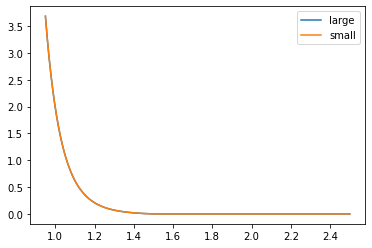

(1.984585306741482, 1.984585306741482)

In [5]:
alpha = 1.5
M = 12
N = 0
disorder = 0

def trunc_shift_mie_cut1(r):
    eps = 1
    sigma = 1+disorder
    rend = alpha*sigma
    
    if(r<=rend):
        U = 2*eps*((sigma/r)**M-(sigma/r)**N) - 2*eps*((sigma/rend)**M-(sigma/rend)**N) 
    else:
        U = 0
        
    return U

def trunc_shift_mie_cut2(r):
    eps = 1
    sigma = 1-disorder
    rend = alpha*sigma
    
    if(r<=rend):
        U = 2*eps*((sigma/r)**M-(sigma/r)**N) - 2*eps*((sigma/rend)**M-(sigma/rend)**N) 
    else:
        U = 0
        
    return U

r = np.arange(.95,2.5,.0001)
# r = np.arange(1.2-20*.0001,1.2+20*.0001,.0001)
# r = np.arange(rmin-20*.0001,rmin+20*.0001,.0001)
U1 = np.array(list(map(trunc_shift_mie_cut1, r)))
plt.plot(r,U1,label='large')
U2 = np.array(list(map(trunc_shift_mie_cut2, r)))
plt.plot(r,U2,label='small')
plt.legend()
plt.show()

rmin = (M/N)**(1/(M-N))*1 if N != 0 else 1

sigma_rL = 1+disorder
sigma_rS = 1-disorder
trunc_shift_mie_cut1(rmin*sigma_rL) , trunc_shift_mie_cut2(rmin*sigma_rS)

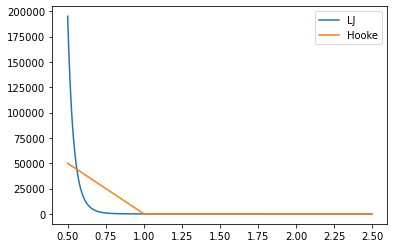

In [65]:
alpha = 1.5
M = 12
N = 6
disorder = 0

def Force_LJ(r):
    eps = 1
    sigma = 1+disorder
    rmin = (M/N)**(1/(M-N))*sigma
    r = r#*rmin
    rend = alpha*sigma#*rmin
    
    if(r<=rend):
        F = 2*eps*(M*(sigma/r)**M-N*(sigma/r)**N)/r 
    else:
        F = 0
        
    return F

def Force_Hooke(r):
    r1 = 1/2
    r2 = 1/2
    radsum = r1+r2
    radcut = 1.1*radsum
    Krep = 1e5
    Katt = 0
    
    if(r <= radsum):
        F = Krep*(radsum-r)
    elif(r > radsum and r <= radcut):
        F = Katt*(radsum-r)
    else:
        F = 0

    return F


r = np.arange(.5,2.5,.0001)
# r = np.arange(1.2-20*.0001,1.2+20*.0001,.0001)
# r = np.arange(rmin-20*.0001,rmin+20*.0001,.0001)
F1 = np.array(list(map(Force_LJ, r)))
plt.plot(r,F1,label='LJ')
U2 = np.array(list(map(Force_Hooke, r)))
plt.plot(r,U2,label='Hooke')
plt.legend()
plt.show()

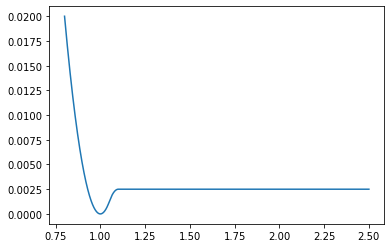

In [34]:
def new_energy(r):
    Katt = 1
    Krep = 1
    radsum = 1
    d = .1
    radcutmid = radsum+.5*d*radsum
    radcut = radsum+d*radsum    
    U_C = -Katt*radsum**2*(d**2/4+d)
    U_end = Katt*radsum**2*d**2/4
    if(r <= radsum):
        U = .5*Krep*(radsum-r)**2  # end 0
    elif(r > radsum and r <= radcutmid):
        U = .5*Katt*(radsum-r)**2  # start 0
    elif(r > radcutmid and r <= radcut):
        U = -.5 * Katt*(radsum-r)**2 + Katt*d*radsum*r + U_C
    else:
        U = U_end
    return U

r = np.arange(.8,2.5,.0001)
U_N = np.array(list(map(new_energy, r)))
plt.plot(r,U_N,label='new_energy')
plt.show()

## Check table file

In [ ]:
Check Lammps potential function
table = open('../LAMMPS/reference/Basic_check/table_ljcut1.txt', 'r')
lines = [line.rstrip() for line in table]

for num, line in enumerate(lines, 0):
    if 'ankit' in line:
        break;

table = []
for num1, line in enumerate(lines[(num+3):], start=0):
    table.append(list(map(float, line.split(" "))))
    
potential = np.array(table, np.float64)

start=0
plt.plot(potential[start:,1],potential[start:,3])
plt.xlabel(r"Disorder, $\beta$")
plt.show()

table2 = open('../Lammps/reference/table2.txt', 'r')
lines2 = [line.rstrip() for line in table2]

for num, line in enumerate(lines2, 0):
    if 'ankit' in line:
        break;

table2 = []
for num1, line in enumerate(lines2[(num+3):], start=0):
    table2.append(list(map(float, line.split(" "))))
    
potential2 = np.array(table2)

diff = potential2 - potential
plt.plot(potential2[:,1],diff[:,3])

# Hooke in LAMMPS

In [ ]:
import lammps_logfile

# Reading table potential file for verification

# _dir = "/media/ankit/A_SSD/PhD/Granular_project/LAMMPS/uniaxial/Hooke/"
_dir = "/media/ankit/A_SSD/PhD/Granular_project/LAMMPS/check/"

count = 2
potential = []
with open(_dir+"hooke11.table") as f:
    line = f.readline()
    while line:
        count +=1
        if(count>8):
            potential.append([float(i) for i in line.split()])
#             print(line)
        line = f.readline()

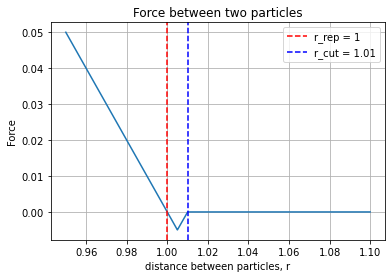

In [51]:

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

K = int(.85*2000000)
potential = np.array(potential)
plt.plot(potential[K:,1],potential[K:,3])
plt.xlabel('distance between particles, r')
# plt.xlabel('$x_{my text}$')
plt.ylabel('Force')
plt.grid()
plt.title('Force between two particles')
plt.axvline(x=1, label='r_rep = {}'.format(1), c='r', ls='--')
plt.axvline(x=1.01, label='r_cut = {}'.format(1.01), c='b', ls='--')
plt.legend()
plt.savefig('Spring_model.png')

# plt.plot(potential[K:,1],potential[K:,2],label='Potential')
# plt.legend()
# plt.show()
# potential[0,3]

In [57]:
## Just comparing if for distance

# potential[:,2]
# min(potential[:,1], key=lambda x:abs(x-1))

r = potential[:,1]
ri = min(range(len(r)), key=lambda i: abs(r[i]-1))     # Calculating delta,
# index where delta is min (that is closest to 0), energy calc by lammps at ri, force calc by lammps at ri, Force at ri , r at ri
ri, potential[ri,2], potential[ri,3], (1-potential[ri,1])*10**5, potential[ri,1]   

(1818181,
 -4.99999999900724,
 -0.014090907063391,
 -0.014090906996777619,
 1.00000014090907)

In [26]:
r = potential[:,1]
U2 = np.array(list(map(Force_Hooke, r)))
plt.plot(r,U2-potential[:,3],label='Force diff')
plt.legend()
plt.show()

NameError: name 'Force_Hooke' is not defined

10001
10001
10001
10001


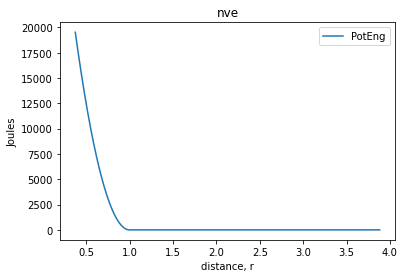

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as net
import lammps_logfile

# scaler = MinMaxScaler()

_dir = "/media/ankit/A_SSD/PhD/Granular_project/LAMMPS/check/"

log = lammps_logfile.File(_dir+"log.lammps")

K1 = 0
# K2 = 
step = 1
timestep = log.data_dict['v_t'][1]-log.data_dict['v_t'][0]
plt.title('nve')
plt.xlabel('distance, r')
plt.ylabel('Joules')
t = log.data_dict['v_t'][K1:]


KE = (log.data_dict['KinEng'][K1:])
PE = (log.data_dict['PotEng'][K1:])
TE = (log.data_dict['TotEng'][K1:])
# TE = (log.data_dict['TotEng'][K1:])

print(len(log.data_dict['Step']))
print(len(log.data_dict['PotEng']))
print(len(log.data_dict['KinEng']))
print(len(log.data_dict['TotEng']))

# plt.plot(log.data_dict['v_dimerdistance'],KE,label='KinEng_small')
plt.plot(log.data_dict['v_dimerdistance'][K1:],PE,label='PotEng')
# plt.plot(PE+KE,label='SumEng')
# plt.plot(1-log.data_dict['v_dimerdistance'],TE,label='TotEng')
plt.legend()
plt.show()

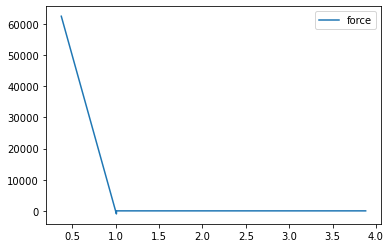

In [59]:
file1 = open(_dir+'dump.neigh', 'r')
lines = [line.rstrip() for line in file1]

file2 = open(_dir+'visualize.du', 'r')
lines2 = [line.rstrip() for line in file2]

num_start = 0
graph_list = []
pairwise_list = np.empty([0,8])
frame = 0
for num1, line in enumerate(lines, 0):
    if 'ITEM' in line:
        if 'ITEM: TIMESTEP' in line:
            curr_timestep1 = int(lines[num1+1])
        if 'ITEM: NUMBER OF ENTRIES' in line:
            num_entries = int(lines[num1+1])
            table = []
        if 'ITEM: ENTRIES' in line:
            x = lines[num1+1:num1+1+num_entries]
            for i in range(len(x)):
                table.append(list(map(float, x[i].split(" "))))
                
            pairwise = np.array(table.copy())
            if len(pairwise):
                pairwise_list = np.append(pairwise_list,pairwise,axis=0)
            else:
                pairwise_list = np.append(pairwise_list,np.zeros([1,8]),axis=0)
#             for num, line in enumerate(lines2, num_start):
#                 if 'ITEM' in line:
#                     if 'ITEM: TIMESTEP' in line:
#                         curr_timestep2 = int(lines2[num+1])
#                         print(num, curr_timestep2, curr_timestep1)
#                     if 'ITEM: NUMBER OF ATOMS' in line:
#                         num_entries2 = int(lines2[num+1])
#                         table = []
#                     if 'ITEM: ATOMS' in line:
#                         x = lines2[num+1:num+1+num_entries2]
#                         for i in range(len(x)):
#                             table.append(list(map(float, x[i].split(" "))))
                                            
#                         grains = np.array(table.copy())
#                         grains = grains[grains[:, 0].argsort()]
#                         num_start = num+1+num_entries2
#                         break;

plt.plot(log.data_dict['v_dimerdistance'],-pairwise_list[:,5],label='force')
# plt.plot(PE+KE,label='SumEng')
# plt.plot(TE,label='TotEng')
plt.legend()
plt.show()

In [ ]:
10**5*(1-0.999999994900998), .5*10**5*(1-0.999999994900998)**2 
# xp = [0.999999994900998, 1.00000049990075]
# fp = [0.000509900244249906, 0]
# np.interp(1, xp, fp)

# Decide NVE + Langevin or MVT for Pressure Stabilisation

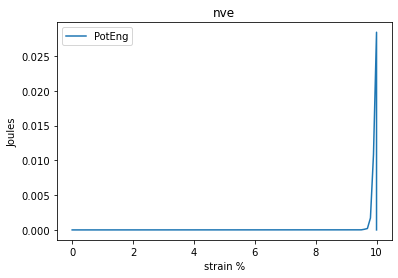

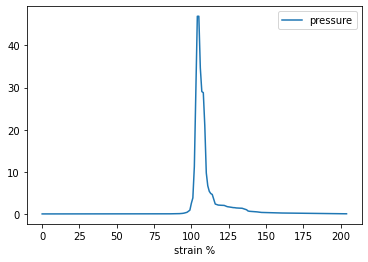

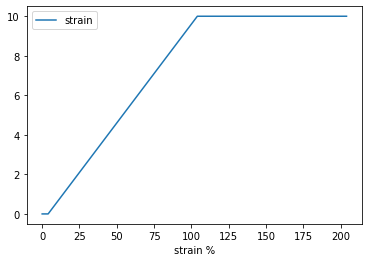

In [148]:
import lammps_logfile

# Reading table potential file for verification

_dir = "/media/ankit/A_SSD/PhD/Granular_project/LAMMPS/uniaxial/Hooke/"

log = lammps_logfile.File(_dir+"log.lammps")

K1 = 0
K2 = -1
step = 1
timestep = log.data_dict['v_t'][1]-log.data_dict['v_t'][0]
plt.title('nve')
plt.xlabel('strain %')
plt.ylabel('Joules')

t = log.data_dict['v_t'][K1:K2:step]
KE = (log.data_dict['KinEng'][K1:K2:step])
PE = (log.data_dict['PotEng'][K1:K2:step])
TE = (log.data_dict['TotEng'][K1:K2:step])
press = (log.data_dict['v_p2'][K1:K2:step])
strain = abs(log.data_dict['v_strain'][K1:K2:step])*100

# plt.plot(strain,KE,label='KinEng_small')
plt.plot(strain,PE,label='PotEng')
# plt.plot(PE+KE,label='SumEng')
# plt.plot(TE,label='TotEng')
# plt.plot(log.data_dict['v_iforce'])
plt.legend()
plt.show()

plt.plot(press,label='pressure')
plt.legend()
plt.xlabel('strain %')
plt.show()

plt.plot(strain,label='strain')
plt.legend()
plt.xlabel('strain %')
plt.show()